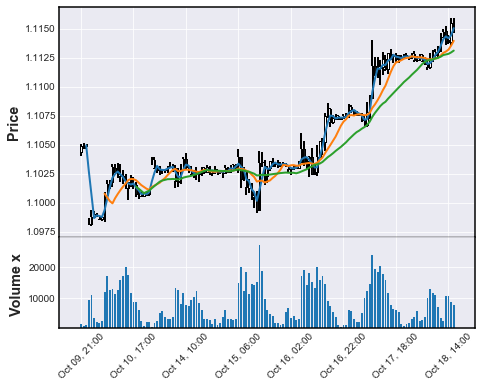

In [1]:

import pandas as pd
import dataframe as df
import numpy as np
import talib
import mplfinance as mpf
%matplotlib inline

data = pd.read_csv('D:\DataSource\EURUSD_Candlestick_1_Hour_ASK_01.09.2018-19.10.2019.csv',index_col=0,parse_dates=True)
data.index.name = 'Date'
data.shape
data = data.loc['2019-10-09 21:00:00':'2019-10-18 16:00:00',:]
mpf.plot(data,type='candle',mav=(3,10,22),volume=True,no_xgaps=True)


In [2]:
data = data.loc['2019-10-09 21:00:00':'2019-10-18 16:00:00',:]
data


,Open,High,Low,Close,Volume
Date,,,,,
2019-10-09 21:00:00,1.10437,1.10507,1.10404,1.10492,1754.0699
2019-10-09 22:00:00,1.10493,1.10514,1.10465,1.10493,989.5500
2019-10-09 23:00:00,1.10492,1.10504,1.10467,1.10503,1207.8300
2019-10-10 00:00:00,1.09844,1.09871,1.09813,1.09820,9472.4400
2019-10-10 01:00:00,1.09820,1.09936,1.09799,1.09880,10986.1300
...,...,...,...,...,...
2019-10-18 12:00:00,1.11433,1.11501,1.11424,1.11476,2580.5500
2019-10-18 13:00:00,1.11477,1.11528,1.11360,1.11396,10630.1000
2019-10-18 14:00:00,1.11400,1.11449,1.11373,1.11385,10808.6700


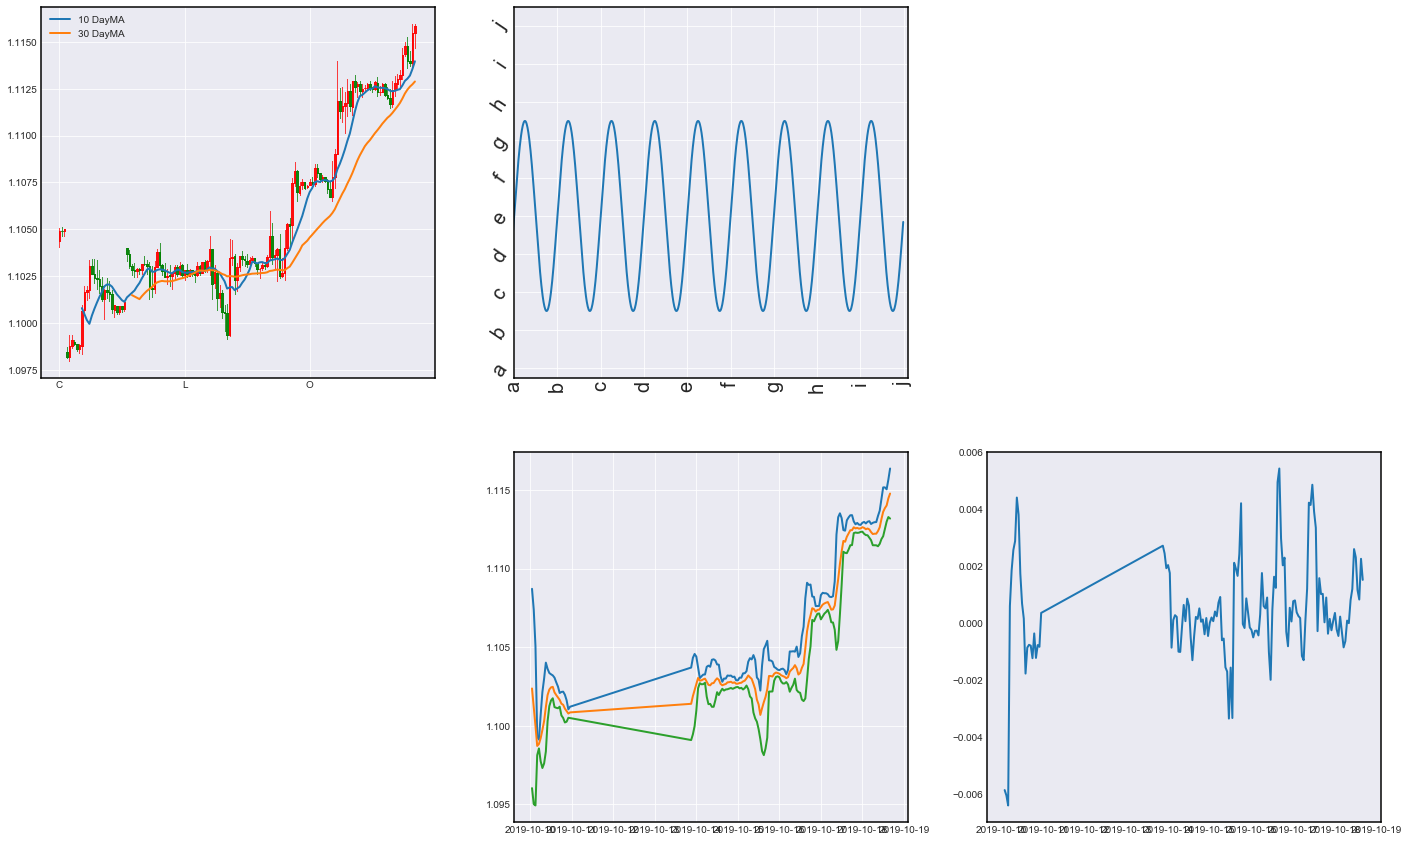

In [147]:
import talib as ta
import datetime
import numpy as np
import pandas as pd
import dataframe as df
import mplfinance as mpf
import mpl_finance as ompf
import matplotlib.pyplot as plt
%matplotlib inline
   

data = pd.read_csv('D:\DataSource\EURUSD_Candlestick_1_Hour_ASK_01.09.2018-19.10.2019.csv',index_col=0,parse_dates=True)
#data.index = df.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) #指變數 x (這裡表index)未來以 『年-月-日』( %Y-%m-%d)方式呈現
#  strftime全名應該是string format time
data.index[::10]   #以每10個為間距[::10]來呈現
data = data.loc['2019-10-09 21:00:00':'2019-10-18 16:00:00',:]

sma_10 = ta.SMA(np.array(data['Close']),10)
sma_30 = ta.SMA(np.array(data['Close']),30)

fig = plt.figure(figsize=(24, 15), dpi=72, facecolor="white",edgecolor="green")

ax = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

ax.set_xticks(range(0, len(data['Close']), 50))

#ax.set_xticklabels(data['Close'][::50])
ax.set_xticklabels('CLOSE')
ax.plot(sma_10, label='10 DayMA')
ax.plot(sma_30, label='30 DayMA')
ax.legend(loc='upper left')


ax2.set_xlim(1,10.1)  #設定座標範圍及座標數，這裡將x座標範圍(set_xlim)設1~10.1
ax2.set_xticks(range(1,11,1))   #籤(set_xticks)設定1~10，標籤間距為1
ax2.set_xticklabels(list("abcdefghij"),fontsize=20,rotation=90) 
ax2.set_ylim(-8.5,11)
ax2.set_yticks(range(-8,11,2))
ax2.set_yticklabels(list("abcdefghij"),fontsize=20,rotation=56) 
x = np.arange(0.0, 10.0, 0.01)
y = 5*np.sin(2*np.pi*x)
ax2.plot(x,y)

ompf.candlestick2_ochl(ax, data['Open'], data['Close'], data['High'], data['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75);

upper, middel, lower = ta.BBANDS(data['Close'], matype=0)
ax5.plot(upper)
ax5.plot(middel)
ax5.plot(lower)

mom = ta.MOM(data['Close'], timeperiod=5)
ax6.plot(mom)

plt.grid()
plt.show()




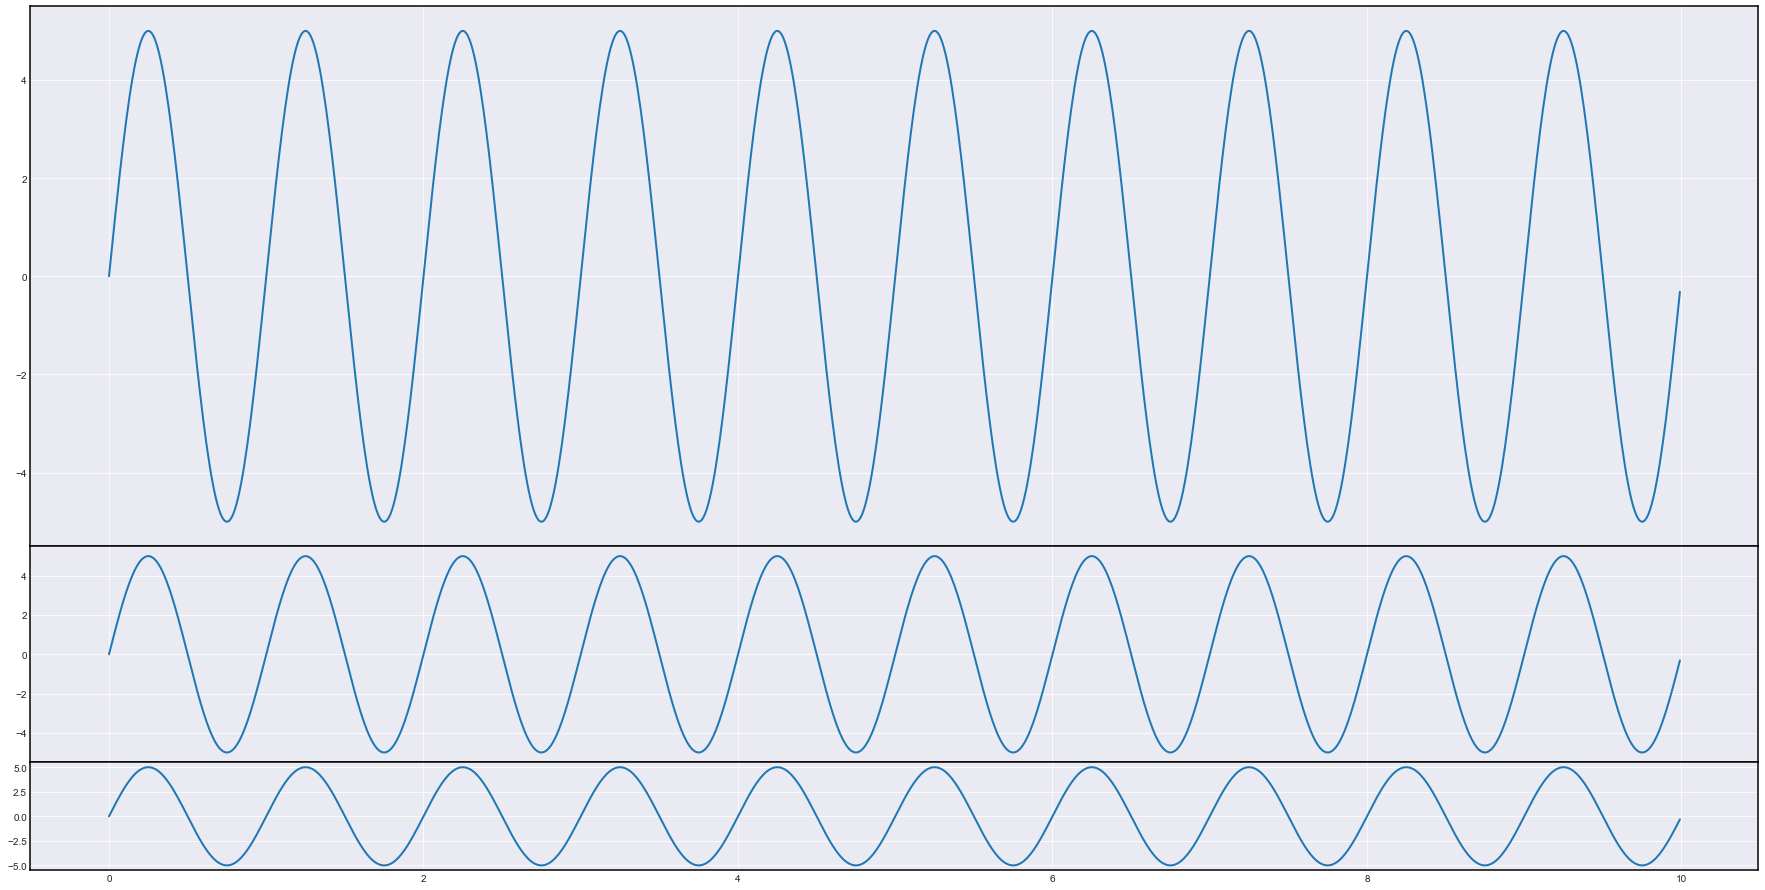

In [4]:
fig = plt.figure(figsize=(24,15))
ax = fig.add_axes([0,0.3,1,0.5])
ax2 = fig.add_axes([0,0.1,1,0.2])
ax3 = fig.add_axes([0,0,1,0.1])

x = np.arange(0.0, 10.0, 0.01)
y = 5*np.sin(2*np.pi*x)

ax.plot(x,y)
ax2.plot(x,y)
ax3.plot(x,y)
plt.show()

Text(0.5, 0, 'STOCH')

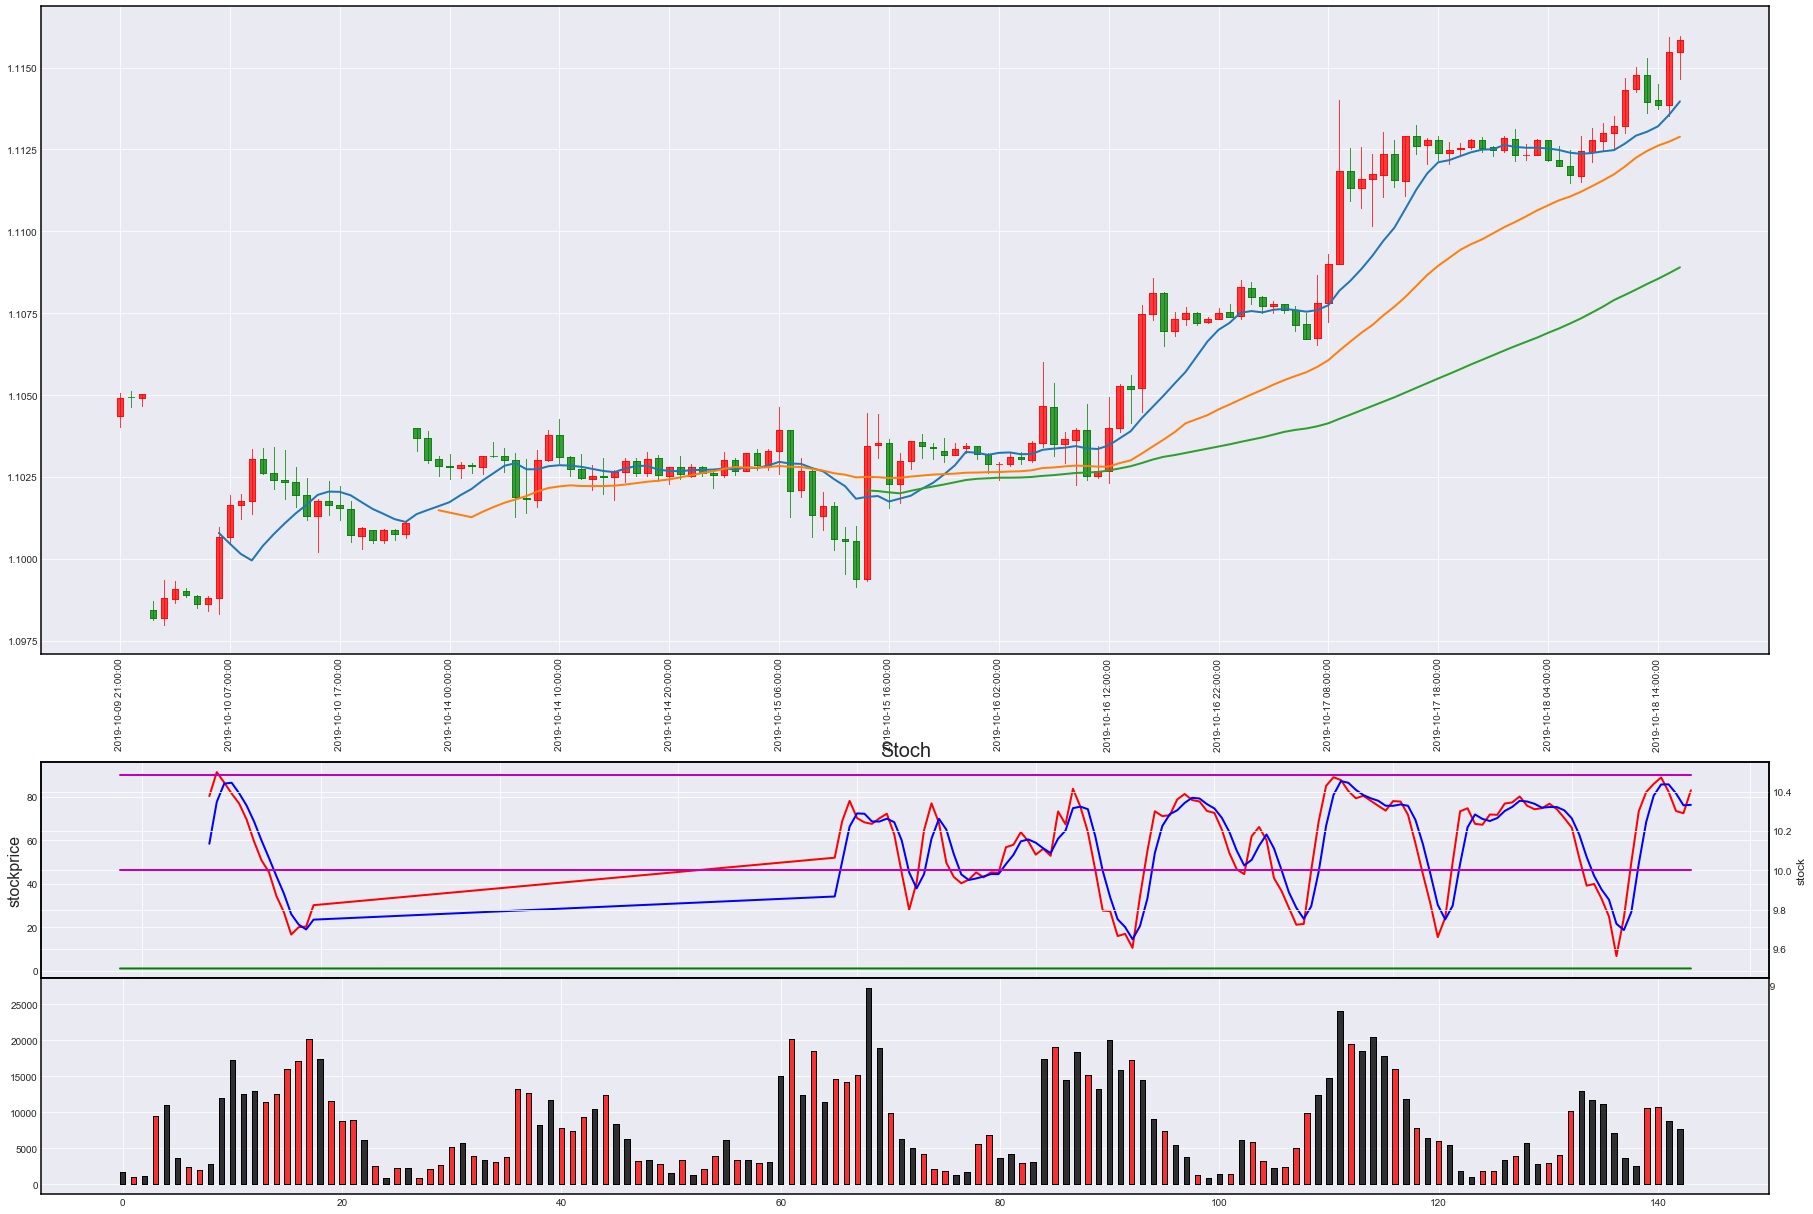

In [96]:
#KD line (https://www.jianshu.com/p/659ff717aad7)

import talib as ta
import datetime
import numpy as np
import pandas as pd
import dataframe as df
import mplfinance as mpf
import mpl_finance as ompf
import matplotlib.pyplot as plt
%matplotlib inline


##### DATA Source #####
data = pd.read_csv('D:\DataSource\EURUSD_Candlestick_1_Hour_ASK_01.09.2018-19.10.2019.csv',index_col=0,parse_dates=True)
#data.index = df.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) #指變數 x (這裡表index)未來以 『年-月-日』( %Y-%m-%d)方式呈現
#  strftime全名應該是string format time
data.index[::10]   #以每10個為間距[::10]來呈現
data = data.loc['2019-10-09 21:00:00':'2019-10-18 16:00:00',:]

##### SMA #####
sma_10 = ta.SMA(np.array(data['Close']),10)
sma_30 = ta.SMA(np.array(data['Close']),30)
sma_69 = ta.SMA(np.array(data['Close']),69)

##### KD STOCH #####
data['slowk'], data['slowd'] = ta.STOCH(data['High'].values,
                        data['Low'].values,
                        data['Close'].values,
                        fastk_period=9,
                        slowk_period=3,
                        slowk_matype=0,
                        slowd_period=3,
                        slowd_matype=0)


fig = plt.figure(figsize = (24, 15))
ax = fig.add_axes([0,0.5,1,0.6])  ##左下角座標 (0,0.2)，寬高 (1,0.5)
ax2 = fig.add_axes([0,0.2,1,0.2])  ##左下角座標 (0,0)，寬高 (1,0.2)
ax3 = fig.add_axes([0,0,1,0.2])


#設定座標數量及所呈現文字
ax.set_xticks(range(0, len(data.index), 10))
ax.set_xticklabels(data.index[::10],rotation=90)

ax.plot(sma_10)
ax.plot(sma_30)
ax.plot(sma_69)
ompf.candlestick2_ochl(ax, data['Open'], data['Close'], data['High'], data['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75);
ompf.volume_overlay(ax3, data['Open'], data['Close'], data['Volume'], width=0.5, alpha=0.8)




ax2.plot(data.index, data.Close, '-', color='g')
ax5 = ax2.twinx()
ax2.plot(data.index, data.slowk, '-', color = 'r')
ax2.plot(data.index, data.slowd, '-', color = 'b')
ax2.plot(data.index, [90]*len(data), '-', color = 'm')
ax5.plot(data.index, [10]*len(data), '-', color = 'm')


ax2.set_ylabel("stockprice", fontsize=16)
ax5.set_ylabel("stock")
ax2.set_title("Stoch", fontsize = 20)
ax2.set_xlabel("STOCH", fontsize=22)


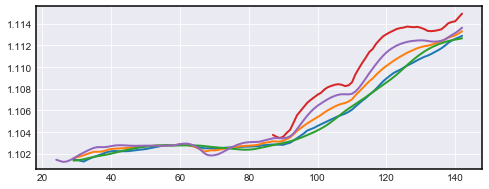

In [1]:
import talib as ta
import datetime
import numpy as np
import pandas as pd
import dataframe as df
import mplfinance as mpf
import mpl_finance as ompf
import matplotlib.pyplot as plt
%matplotlib inline


##### DATA Source #####
data = pd.read_csv('D:\DataSource\EURUSD_Candlestick_1_Hour_ASK_01.09.2018-19.10.2019.csv',index_col=0,parse_dates=True)
#data.index = df.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) #指變數 x (這裡表index)未來以 『年-月-日』( %Y-%m-%d)方式呈現
#  strftime全名應該是string format time
data.index[::10]   #以每10個為間距[::10]來呈現
data = data.loc['2019-10-09 21:00:00':'2019-10-18 16:00:00',:]


SMA = ta.SMA(np.array(data['Close']), timeperiod=30)         #SMA - Simple Moving Average
WMA = ta.WMA(np.array(data['Close']), timeperiod=30)         #WMA - Weighted Moving Average
TRIMA = ta.TRIMA(np.array(data['Close']), timeperiod=30)     #TRIMA - Triangular Moving Average
TEMA = ta.TEMA(np.array(data['Close']), timeperiod=30)       #TEMA - Triple Exponential Moving Average
T3 = ta.T3(np.array(data['Close']), timeperiod=5, vfactor=0) #T3 - Triple Exponential Moving Average (T3)
upper, middel, lower = ta.BBANDS((data['Close']), timeperiod=30, nbdevup=2, nbdevdn=2, matype=0) # BBand
macd, macdsignal, macdhist = ta.MACD((data['Close']), fastperiod=3, slowperiod=5, signalperiod=9) #MACD




fig = plt.figure(figsize = (8,3))
ax = fig.add_subplot(1,1,1)
ax.plot(SMA)
ax.plot(WMA)
ax.plot(TRIMA)
ax.plot(TEMA)
ax.plot(T3)
#ax.plot(BBupper)
#ax.plot(BBmiddel)
#ax.plot(BBlower)
#ax.plot(macd)
#ax.plot(macdsignal)
#ax.plot(macdhist)
